# Custom Models and Training w/ TensorFlow:

* `tensorflow`'s low level Python API will be useful when you need extra control to write custom loss functions, custom metrics, layers, models, initializers, regularizers, weight constraints, and more.

# A. TensorFlow:

* **What does TensorFlow offer?**
    * Its core is very similar to NumPy, but with GPU support.
    * It supports distributed computing (across multiple devices and servers).
    * It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the computation graph from a Python function, optimizing it (e.g., by pruning unused nodes), and running it efficiently (e.g., by automatically running independent operations in parallel).
    * Computation graphs can be exported to a portable format, so you can train a TensorFlow model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device).
    * It implements reverse-mode autodiff and provides some excellent optimizers, such as RMSProp and Nadam , so you can easily minimize all sorts of loss functions.<br><br>

* At the lowest level, each TensorFlow operation (op for short) is implemented using highly efficient C++ code:
    * Many operations have multiple implementations called kernels: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (tensor processing units).
    * GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads.
    * TPUs are even faster: they are custom ASIC chips built specifically for deep learning operations.<br><br>

* **Overview of TensorFlow's Python API:<br>**
    &emsp; 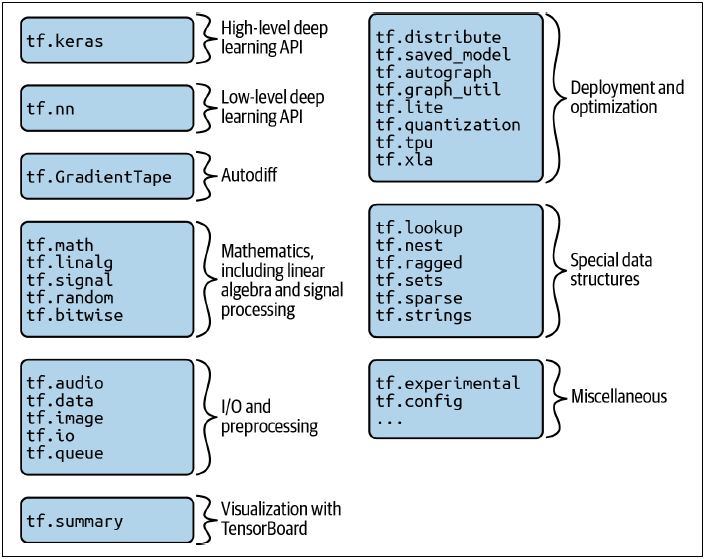 <br><br>

* **TensorFlow Architecture: <br>**
    &emsp; 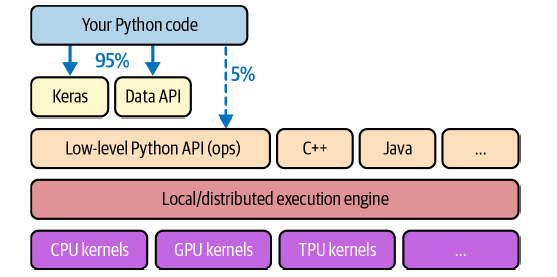 <br><br>


# B. Using TensorFlow like NumPy:

### B.1 Tensors and Operations:

* You can create a tensor w/ `tf.constant()`
* `tf.Tensor` has a shape and a data type.
* Indexing works much like in NumPy.
* A tensor can also hold a scalar value.

In [1]:
import tensorflow as tf

In [2]:
t = tf.constant(
    [
        [1., 2., 3.],
        [4., 5., 6.]
    ]
)

In [3]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

In [6]:
#indexing 
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [11]:
tf.matmul(t, t, transpose_b=True)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

### B.2.Tensors and Numpy:

* You can create a tensor from a NumPy array, and vice versa.
* You can apply TensorFlow operations to NumPy arrays and NumPy operations to tensors.
* NumPy uses 64-bit precision by default, while Tensor‐Flow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So when you create a tensor from a NumPy array, make sure to set `dtype=tf.float32`.

In [13]:
import numpy as np

In [14]:
a = np.array([2., 4., 5.])

In [15]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [16]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### B.3. Type Conversions:

* Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically:
    * To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types.
    * For example, you cannot add a float tensor and an integer tensor, and you cannot even add a 32-bit float and a 64-bit float.
    * Use `tf.cast()` when converting types

In [19]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [20]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### B.4. Variables:

* `tf.Tensor` values from `tf.constant` are immutable (cannot be modified). This means that regular tensors cannot be used to implement weights in a neural network, since they need to be tweaked by backpropagation. Plus, other parameters may also need to change over time (e.g., a momentum optimizer keeps track of past gradients).

* `tf.Variable`:
    * Acts much like a `tf.Tensor` : you can perform the same operations w/ it, plays nicely w/ NumPy, and is just picky w/ types.
    * But it can also be modified in place using the `assign()` method (or `assign_add()` or `assign_sub()`, w/c increment or decrement the variable by the given value).
    * You can also modify individual cells (or slices), by using the cell's (or slice's) `assign()` method or by using the `scatter_update()` or `scatter_nd_update()` methods.
    * Direct assignment will not work
    * In practice you will rarely have to create variables manually; Keras provides an `add_weight()` method that will take care of it for you. Model parameters will generally be updated directly by the optimizers, so you will rarely need to update variables manually.

In [21]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [22]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [23]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [24]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [26]:
v.scatter_nd_update(
    indices=[[0,0], [1, 2]],
    updates=[100, 200.]
)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [27]:
#v[1] = [7., 8., 9.]

### B.5. Strings:

In [28]:
tf.constant(b"Hello World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [29]:
tf.constant("Hello World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [30]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [31]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [32]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [33]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [34]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### B.6. Other Data Structures:

* **TensorFlow supports several other data structures**:

1. Sparse Tensors (`tf.SparseTensor`):
    * Efficiently represent tensors containing mostly zeros. The `tf.sparse` package contains operations for sparse tensors.

2. Tensor Arrays (`tf.TensorArray`):
    * Are lists of tensors. They have a fixed length by default but can optionally be made extensible. All tensors they contain must have the same shape and data type.

3. Ragged Tensors (`tf.RaggedTensor`):
    * Represent lists of tensors, all of the same rank and data type, but with varying sizes. The dimensions along which the tensor sizes vary are called the ragged dimensions. The `tf.ragged` package contains operations for ragged tensors.

4. String Tensors:
    * Are regular tensors of type `tf.string`.
    * These represent byte strings, not Unicode strings, so if you create a string tensor using a Unicode string (e.g., a regular Python 3 string like `"café"`), then it will get encoded to UTF-8 automatically (e.g., `b"caf\xc3\xa9"`).
    * Alternatively, you can represent Unicode strings using tensors of type `tf.int32`, where each item represents a Unicode code point (e.g., `[99, 97, 102, 233]`).
    * The `tf.strings` package (with an s) contains ops for byte strings and Unicode strings (and to convert one into the other).
    * Note that `tf.string` is atomic, its length does not appear in the tensor's shape. Once converted to Unicode tensor (i.e., a tensor of type `tf.int32` holding Unicode code points), the length appears in the shape.

5. Sets:
    * Are represented as regular tensors (or sparse tensors).
    * For example, `tf.constant([[1, 2], [3, 4]])` represents the two sets `{1, 2}` and `{3, 4}`. More generally, each set is represented by a vector in the tensor’s last axis. You can manipulate sets using operations from the `tf.sets` package.

6. Queues:
    * Store tensors across multiple steps. TensorFlow offers various kinds of queues.
        * FIFO (first-in, first-out) queues (`FIFOQueue`)
        * Queues that can prioritize some items (`PriorityQueue`)
        * Shuffle Items (`RandomShuffleQueue`)
        * Batch Items of different shapes by padding (`PaddingFIFOQueue`)
    * `tf.queue` package

In [35]:
# String Arrays
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
p

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b'Caf\xc3\xa9', b'Coffee', b'caff\xc3\xa8',
       b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

In [36]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [37]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

In [38]:
# Ragged Tensors
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101])>

In [39]:
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>

In [40]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [41]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [42]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

In [43]:
# Sparse Tensors
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])
s

In [44]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [45]:
print(s * 42.0)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 42.  84. 126.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [46]:
tf.sparse.to_dense(s*42)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[  0.,  42.,   0.,   0.],
       [ 84.,   0.,   0.,   0.],
       [  0.,   0.,   0., 126.]], dtype=float32)>

In [47]:
try:
    s + 42.0
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [48]:
# shows how to multiply a sparse tensor and a dense tensor
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [49]:
#when creating a sparse tensor, values must be given in "reading order", or else `to_dense()` will fail.
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],  # WRONG ORDER!
                     values=[1., 2.],
                     dense_shape=[3, 4])
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [50]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [51]:
# Tensor Arrays
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))

In [52]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [53]:
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)
tensor1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [54]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [55]:
#disable clear_after_read
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1., 2.]))
array2 = array2.write(1, tf.constant([3., 10.]))
array2 = array2.write(2, tf.constant([5., 7.]))
tensor2 = array2.read(1)
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [56]:
# create and use a tensor array with a dynamic size
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1., 2.]))
array3 = array3.write(1, tf.constant([3., 10.]))
array3 = array3.write(2, tf.constant([5., 7.]))
tensor3 = array3.read(1)
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [57]:
# Sets
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
print(u)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]], shape=(5, 2), dtype=int64), values=tf.Tensor([ 1  5  6  9 11], shape=(5,), dtype=int32), dense_shape=tf.Tensor([1 5], shape=(2,), dtype=int64))


In [58]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]])>

In [59]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]])>

In [60]:
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]])>

In [61]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [62]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

In [63]:
#check whether set1[0] contains 5
tf.sets.size(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [64]:
# Queues
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b"windy"])
q.enqueue([15, b"sunny"])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [65]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [66]:
q.enqueue_many([[13, 16], [b'cloudy', b'rainy']])

In [67]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

# C. Customizing Models and Training Algorithms:

### C.1. Custom Loss Functions:

* For better performance, use a vectorized implementation. Moreover if you want to benefit from TensorFlow's graph optimization features, use only TensorFlow operations.

* Huber Loss:
    * Loss function that is less sensitive to outliers than the MSE.
    * `tf.keras.losses.Huber` class. <br>
    &emsp; 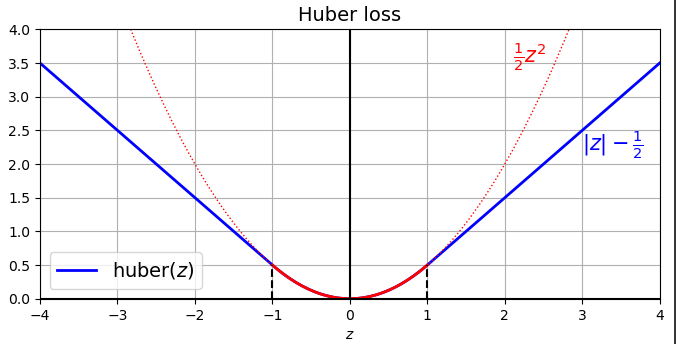 <br>

In [68]:
# Assuming huber loss is not availble in keras :
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [70]:
# Use the custom huber_fn in the compile method
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.4827 - mae: 0.8318 - val_loss: 0.3478 - val_mae: 0.6525
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.2411 - mae: 0.5412 - val_loss: 0.2641 - val_mae: 0.5484


### C.2. Saving and Loading Models That Contain Custom Components:

* When loading a custom loss function, provide a dictionary that maps the function name to the actual function.
    * More generally, when you load a model containing custom objects, you need to map the names of the objects.
    * Decorating the *custom object* with `@keras.utils.register_keras_serializable()`, it will automatically be available to the `load_model()` function: There's no need to include it in the `custom_objects` dictionary.

* When a loading a custom loss function with a variable input, you will have to specify the input value manually. This can be solve by creating a subclass of the `tf.keras.losses.Loss` class and then implementing its `get_config()` method.
    * The constructor accepts `**kwargs` and passes them to the parent constructor, which handles standard hyperparameters: the `name` of the loss and the `reduction` algorithm to use to aggregate the individual instance losses. By default this is `"AUTO"`, which is equivalent to `"SUM_OVER_BATCH_SIZE"`: the loss will be the sum of the instance losses, weighted by the sample weights, if any, and divided by the batch size (not by the sum of weights, so this is not the weighted mean).Other possible values are `"SUM"` and `"NONE"`.
    * The `call()` method takes the labels and predictions, computes all the instance losses, and returns them.
    * The `get_config()` method returns a dictionary mapping each hyperparameter name to its value. It first calls the parent class’s `get_config()` method, then adds the new hyperparameters to this dictionary.

In [72]:
model.save("model_custom_loss_function")

INFO:tensorflow:Assets written to: model_custom_loss_function\assets


In [73]:
model = tf.keras.models.load_model("model_custom_loss_function",
                                   custom_objects={"huber_fn": huber_fn})

In [74]:
model.fit(X_train_scaled, y_train, 
          epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 5ms/step - loss: 0.2050 - mae: 0.4906 - val_loss: 0.2199 - val_mae: 0.4934
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1885 - mae: 0.4677 - val_loss: 0.2025 - val_mae: 0.4775


In [75]:
# huber func w/ variable error threshold
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) /2 
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

model.compile(loss=create_huber(2.0), optimizer="nadam")

In [76]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.2049 - val_loss: 0.2229
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.1977 - val_loss: 0.2056


In [77]:
model.save("model_custom_loss_fn_var_threshold")

INFO:tensorflow:Assets written to: model_custom_loss_fn_var_threshold\assets


In [78]:
model = tf.keras.models.load_model(
    "model_custom_loss_fn_var_threshold",
    custom_objects={"huber_fn": create_huber(2.0)}
)

In [79]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
285/363 [======================>.......] - ETA: 0s - loss: 0.1955

363/363 [==============================] - 4s 6ms/step - loss: 0.1933 - val_loss: 0.1988
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1895 - val_loss: 0.1871


In [80]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwrags):
        self.threshold = threshold
        super().__init__(**kwrags)
    
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2/2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [81]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [82]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [83]:
model.fit(
    X_train_scaled, y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/2


363/363 [==============================] - 3s 5ms/step - loss: 0.6454 - mae: 0.8438 - val_loss: 0.5095 - val_mae: 0.6720
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2910 - mae: 0.5549 - val_loss: 0.3744 - val_mae: 0.5699


In [84]:
model.save("model_custom_loss_class")

INFO:tensorflow:Assets written to: model_custom_loss_class\assets


In [85]:
model = tf.keras.models.load_model(
    "model_custom_loss_class",
    custom_objects = {"HuberLoss": HuberLoss}
)

In [86]:
model.fit(
    X_train_scaled, y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/2


363/363 [==============================] - 4s 6ms/step - loss: 0.2415 - mae: 0.5031 - val_loss: 0.2906 - val_mae: 0.5044
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2171 - mae: 0.4771 - val_loss: 0.2530 - val_mae: 0.4856


In [87]:
model.loss.threshold

2.0

### C.3. Custom Activation Functions, Initializers, Regularizers, and Constraint:

* Most of the time, you will just need to write a simple function with the appropriate inputs and outputs.
* Arguments depend on the type of custom function.

* The activation function will be applied to the output of the `Dense` Layer, and its result will be passed on the next layer. The layer's weights will be initialized  using the value returned by the initializer. At each training step the weights will be passed to the regularization function to compute the regularization loss, which will be added to the main loss to get the final loss used for training. Finally, the constraint function will be called after each training step, and the layer's weights will be replaced by the constrained weights.

* If a function has hyperparameters that need to be saved along w/ the model, then you will want to subclass the appropriate class such as:
    * `tf.keras.regularizers.Regularizer`
    * `tf.keras.constraints.Constraints`
    * `tf.keras.initializers.Initializer`
    * `tf.keras.layers.Layer` (For any layer, including activation functions)
    * Note that you must implement the `call()` method for losses, layers(including activation functions), or the `__call__()` method for regularizers, initializers, and constraints.

In [88]:
# equivalent to tf.keras.softplus() or tf.nn.softplus()
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

# equivalent to tf.keras.initializers.glorot_normal()
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return  tf.random.normal(shape, stddev=stddev, dtype=dtype)

# equivalent to tf.keras.regularizers.l1(0.01)
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

# equivalent to tf.keras.constraints.nonneg() or tf.nn.relu()
def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [89]:
layer = tf.keras.layers.Dense(
    1,
    activation=my_softplus,
    kernel_initializer=my_glorot_initializer,
    kernel_regularizer=my_l1_regularizer,
    kernel_constraint=my_positive_weights
)

In [90]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        30, activation='relu', kernel_initializer='he_normal', input_shape=input_shape
    ),
    layer
])

model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

model.fit(
    X_train_scaled, y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

model.save("model_with_many_custom_parts")

Epoch 1/2


363/363 [==============================] - 5s 7ms/step - loss: 1.4686 - mae: 0.8298 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.8104 - mae: 0.6168 - val_loss: 2.5983 - val_mae: 0.6052
INFO:tensorflow:Assets written to: model_with_many_custom_parts\assets


In [91]:
model = tf.keras.models.load_model(
    "model_with_many_custom_parts",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus
    }
)

model.fit(
    X_train_scaled, y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.6324 - mae: 0.5611 - val_loss: 1.1383 - val_mae: 0.5456
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.5566 - mae: 0.5299 - val_loss: 1.0250 - val_mae: 0.5246


In [92]:
tf.keras.backend.clear_session()
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_confg(self):
        return {"factor": self.factor}

In [93]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        30, activation='relu', kernel_initializer='he_normal', input_shape=input_shape
    ),
    tf.keras.layers.Dense(
        1, 
        activation=my_softplus,
        kernel_regularizer=MyL1Regularizer(0.01),
        kernel_constraint=my_positive_weights,
        kernel_initializer=my_glorot_initializer
    )
])

model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

model.fit(
    X_train_scaled, y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

model.save("model_with_many_custom_parts")

Epoch 1/2


363/363 [==============================] - 3s 4ms/step - loss: 1.4686 - mae: 0.8298 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.8104 - mae: 0.6168 - val_loss: 2.5983 - val_mae: 0.6052
INFO:tensorflow:Assets written to: model_with_many_custom_parts\assets


In [94]:
model = tf.keras.models.load_model(
    "model_with_many_custom_parts",
    custom_objects={
        #"MyL1Regularizer": MyL1Regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus
    }
)

model.fit(
    X_train_scaled, y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.5932 - mae: 0.5392 - val_loss: 0.5418 - val_mae: 0.5021
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.5107 - mae: 0.4985 - val_loss: 0.5600 - val_mae: 0.4802


### C.4. Custom Metrics:

* Losses and metrics are conceptually not the same thing:
    * Losses are used by gradient descent to train a model, so they must be differentiable (at least at the points where they are evaluated), and their gradients should not be zero everwhere.
    * Metrics are used to evaluate a model: they must be more easily interpretable, and they can be nondifferentiable or have zero gradients everywhere.
    * In most cases, defining a custom metric function is exactly the same as defining a custom loss function.

* For each batch during training, Keras will compute this metric and keep track of its mean since the beginning of the epoch. Most of the time, this is exactly what you want, but not always.

* **Streaming Metrics**:
    * Consider a binary classifier's precision (Precision = TP / (TP +FP)). Suppose the model mad 5 Positive Predictions in the 1st batch, 4 of w/c were correct : P1 = 80%. Then suppose the model made 3 positive predictions in the 2nd batch, but they were all incorrect : P2 = 0%. Since there are a total of 4 (4+0) TP out of 8 positive predictions (5+3), the overall precision is 50% NOT the mean of the 2 batches.
    * `tf.keras.metrics.Precision` class can keep track of the no. of TP and the no. of FP and that can compute the precision based on these numbers when requested.
    * This is called a streaming metric (or stateful metrics) as it is gradually updated, batch after batch.

* If you need to define your own custom streaming metric, create a subclass of the `tf.keras.metrics.Metric` class.
* Keras will take care of variable persistence seamlessly; no action is required.
* When you define a metric using a simple function, Keras automatically calls it for each batch, and it keeps track of the mean during each epoch.


In [95]:
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [96]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [97]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2


363/363 [==============================] - 3s 3ms/step - loss: 1.7450 - huber_fn: 0.6825
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.7879 - huber_fn: 0.3138


In [98]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [99]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [100]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [101]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [102]:
precision.reset_states()

In [103]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [104]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=0.1, **kwargs):
        super().__init__(**kwargs)  # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    
    def result(self):
        return self.total / self.count
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [105]:
m = HuberMetric(2.0)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [106]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [107]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [108]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [109]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [110]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [111]:
model.compile(loss=create_huber(2.0), optimizer="nadam",
              metrics=[HuberMetric(2.0)])

model.save("model_with_a_custom_metric")

INFO:tensorflow:Assets written to: model_with_a_custom_metric\assets


In [112]:
model = tf.keras.models.load_model(
    "model_with_a_custom_metric",
    custom_objects={
        "huber_fn": create_huber(2.0),
        "HuberMetric": HuberMetric
    }
)

In [113]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
136/363 [==========>...................] - ETA: 0s - loss: 1.0764 - huber_metric_1: 1.0764

363/363 [==============================] - 3s 5ms/step - loss: 0.6454 - huber_metric_1: 0.6454
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2910 - huber_metric_1: 0.2910


In [114]:
model.metrics[-1].threshold

2.0

In [115]:
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold} 

In [116]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.Huber(2.0), optimizer="nadam",
              weighted_metrics=[HuberMetric(2.0)])

np.random.seed(42)
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 3s 3ms/step - loss: 0.3252 - HuberMetric: 0.6553
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1446 - HuberMetric: 0.2915


In [117]:
(history.history["loss"][0],
 history.history["HuberMetric"][0] * sample_weight.mean())

(0.3251718282699585, 0.3251719045631172)

### C.5. Custom Layers:

* Custom Layers:
    * You may occasionally want to build an architecture that contains an exotic layer for which TensorFlow does not provide a default implementation.
    * You may simply want to build a very repetitive architecture, in which a particular block of layers is repeated many times, and it would be convenient to treat each block as a single layer.

* There are some layers that have no weights such as `tf.keras.layers.Flatten` or `tf.keras.layers.ReLu`:
    * To create a custom layer w/o any weights, the simplest option is to write a function and wrap it in a `tf.keras.layers.Lambda` layer.

* Custom layer can be used like any other layer , using the sequential API, the functional API, or the subclassing API. You can also use it as an activation function.

* To build a custom stateful layer (i.e., a layer with weights), create a subclass of the `tf.keras.layers.Layers`
    * The constructor takes all the hyperparameters as arguments and importantly it also takes `**kwargs` argument. It calls the parent constructor, passing it the `kwargs`: This takes care of standard argument such as `input_shape`, `trainable`, and `name`. Then it saves the hyperparametres as attributes, converting the activation argument to the appropriate activation function using the `tf.keras.activations.get()` function.
    * The `build()` method’s role is to create the layer’s variables by calling the `add_weight()` method for each weight. The `build()` methods is called the first time the layer is used. At that point, Keras will know the shape of this layer's inputs, and it will pass it to the `build()` method, w/c is often necessary to create some of the weights. For example, we need to know the number of neurons in the previous layer in order to create the connection weights matrix (i.e., the "kernel"): this corresponds to the size of the last dimension of the inputs. At the end of the `build()` method (and only at the end), you must call the parent's `build()` method: this tells Keras that the layer is built (it sets `self.built=True`).
    * The `call()` method performs the desired operations. 

* Keras automatically infers the output shape, except when the layer is dynamic. In this (rare) case, you need to implement the `compute_output_shape()` method, which must return a TensorShape object.

* To create a layer with multiple inputs (e.g., `Concatenate`), the argument to the `call()` method should be a `tuple` containing all the inputs. To create a layer with multiple outputs, the `call()` method should return the `list` of outputs.
    * This layer can be used like any other layer using the functional and subclassing API , not the sequential API (w/c only accepts layers w/ one input and one output).

* If your layer needs to have a different behavior during training and during testing (e.g., if it uses  `Dropout ` or  `BatchNormalization ` layers), then you must add a `training ` argument to the  `call() ` method and use this argument to decide what to do:
    


In [118]:
# exponential function can be used in keras : activation="exponential"
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [119]:
# Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5


363/363 [==============================] - 3s 6ms/step - loss: 0.7784 - val_loss: 0.4393
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5702 - val_loss: 0.4094
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4431 - val_loss: 0.3760
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4984 - val_loss: 0.3785
Epoch 5/5
162/162 [==============================] - 0s 3ms/step - loss: 0.3781


0.3781099021434784

In [120]:
# simplified version of the Dense Layer
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="he_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": tf.keras.activations.serialize(self.activation)}

In [121]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)
model.save("model_with_a_custom_layer")

Epoch 1/2


363/363 [==============================] - 3s 4ms/step - loss: 3.1061 - val_loss: 7.1579
Epoch 2/2
162/162 [==============================] - 1s 3ms/step - loss: 0.7029
INFO:tensorflow:Assets written to: model_with_a_custom_layer\assets


In [122]:
model = tf.keras.models.load_model("model_with_a_custom_layer",
                                   custom_objects={"MyDense": MyDense})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.5935 - val_loss: 0.5097
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.4701 - val_loss: 0.5948


In [123]:
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2, X1 / X2

In [124]:
inputs1 = tf.keras.layers.Input(shape=[2])
inputs2 = tf.keras.layers.Input(shape=[2])
MyMultiLayer()((inputs1, inputs2))

(<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>)

In [125]:
X1, X2 = np.array([[3., 6.], [2., 7.]]), np.array([[6., 12.], [4., 3.]]) 
MyMultiLayer()((X1, X2))

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 9., 18.],
        [ 6., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[18., 72.],
        [ 8., 21.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5      , 0.5      ],
        [0.5      , 2.3333333]], dtype=float32)>)

In [126]:
# Layer w/ a different behavior during training and test:
# Adds Guassian Noise during training (for regularization) but does nothing during test (same as tf.keras.layers.GaussianNoise)

class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X
    

In [127]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    MyGaussianNoise(stddev=1.0, input_shape=input_shape),
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2


363/363 [==============================] - 3s 5ms/step - loss: 2.2197 - val_loss: 25.3956
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 1.1056


1.1055991649627686

### C.6. Custom Models:

* Subclass the `tf.keras.Model` class, create layers and variables in the constructor and implement the `call()` method to do whatever you want the model to do. <br>

* Example: Build the model represented below. An arbitrary model with a custom `ResidualBlock` layer containing a skip connection. (A residual block adds its inputs to its outputs.) <br>
&emsp; 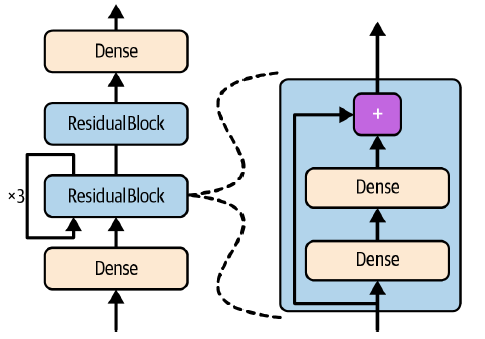 <br>
    * The inputs go through a first dense layer, then through a residual block composed of two dense layers and an addition operation, then through this same residual block 3 more times, then through a 2nd residual block , and the final result goes through a dense output layer.
    * To implement this model, it is best to first create a `ResidualBlock` layer, since we are going to create a couple of identical blocks (and we might want to reuse it in another Model)
        * This layer will contain other layers.
        * This is handled transparently by Keras: It automatically detects that the `hidden` attribute contains trackable objects (layers in this case), so their variables are automatically added to this layer's list of variables.
    * To be able to save the model using the `save()` method and load it using the `tf.keras.load_model()` implement the `get_config()` method in both the `ResidualBlock` class and `ResidualRegressor` class. 
        * Alternatively, you can save and load the weights using the `save_weights()` and `load_weights()` methods.

* The `Model` class is a subclass of `Layer` class, so models can be defined and used exactly like layers. But a `Model` has some extra functionalities (`compile(), fit(), evaluate(), predict(), get_layer(), save()`...).
    * It is usually cleaner to distinguish the internal components of your model (i.e., layers or reusable blocks of layers) from the model itself (i.e., the object you will train). The former should subclass the `Layer` class, while the latter should subclass the `Model` class.

In [128]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwarggs):
        super().__init__(**kwarggs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu', kernel_initializer='he_normal') 
            for _ in range(n_layers) ] 

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

    def get_config(self):
        base_config = super().get_config()
        return {**base_config}

In [129]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_normal')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config}

In [130]:
tf.keras.utils.set_random_seed(42)

model = ResidualRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save('resisdualblock_custom_model')

Epoch 1/2


363/363 [==============================] - 8s 7ms/step - loss: 30.7726
Epoch 2/2
162/162 [==============================] - 1s 3ms/step - loss: 1.0908


INFO:tensorflow:Assets written to: resisdualblock_custom_model\assets


INFO:tensorflow:Assets written to: resisdualblock_custom_model\assets


In [131]:
model = tf.keras.models.load_model("resisdualblock_custom_model")
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 4s 4ms/step - loss: 0.9173
Epoch 2/2
1/1 [==============================] - 0s 180ms/step


array([[1.0191149],
       [1.5131273],
       [4.2167306]], dtype=float32)

In [132]:
# Defining the model using the sequential API
block1 = ResidualBlock(2, 30)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    tf.keras.layers.Dense(1)
])


### C.7. Losses and Metrics Based on Model Internals:

* To define a custom loss based on model internals, compute it based on any part of the model you want, then pass the result to the `add_loss()` method.
* To add a custom metric, use the model's `add_metric()` method.

In [133]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation='relu', kernel_initializer='he_normal') for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(name='reconstruction_error')
    
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
    
    def call(self, inputs, training=False):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [134]:
tf.keras.utils.set_random_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_test_scaled)

Epoch 1/5


363/363 [==============================] - 4s 4ms/step - loss: 0.7936 - reconstruction_error: 1.0617
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4678 - reconstruction_error: 0.5440
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4157 - reconstruction_error: 0.3934
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3876 - reconstruction_error: 0.3524
Epoch 5/5
162/162 [==============================] - 1s 3ms/step


### C.8. Computing Gradients Using Autodiff:

* `tf.GradientTape` context will automatically record every operation that involves a variable.
    * The `gradient()` method only goes through the recorded computations once (in reverse order), no matter how many variable there are.
    * The tape is automatically erased immeidately after you call its `gradient()` method. To call `gradient()` more than once, make the tape persistent and delete it each time you are done w/ it to free resources.
    * By default, the tape will only track operations involving variables. However, the tape can be forced to watch any tensors to record every operation that involves them using the `watch()` method. This can be useful in some cases, like if you want to implement a regularization loss that penalizes activations that vary a lot when the inputs vary little: the loss will be based on the gradient of the activations with regard to the inputs. Since the inputs are not variables, you’ll need to tell the tape to watch them.
    * Most of the time a gradient tape is used to compute the gradients of a single value (usually the loss) with regard to a set of values (usually the model parameters).

* If you try to compute the gradients of a vector, for example a vector containing multiple losses, then TensorFlow will compute the gradients of the vector’s sum. So if you ever need to get the individual
gradients (e.g., the gradients of each loss with regard to the model parameters), you must call the tape’s `jacobian()` method: it will perform reverse-mode autodiff once for each loss in the vector (all in parallel by default).
* In some cases you may want to stop gradients from backpropagating through some part of your neural network. To do this, you must use the `tf.stop_gradient()` function. The function returns its inputs during the forward pass (like `tf.identity()`), but it does not let gradients through during backpropagation (it acts like a constant).

In [135]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [136]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [137]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [138]:
# reverse-mode autodiff
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [139]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [140]:
#tape.gradient(z, [w1, w2])

In [141]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)  # returns tensor 36.0
dz_dw2 = tape.gradient(z, w2)  # returns tensor 10.0
del tape

In [142]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [143]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients


[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [144]:
# if given a vector, tape.gradient() will compute the gradient of  the vector's sum.
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [145]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    z = z1 + z2 + z3

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [146]:
# how to compute the jacobians and the hessians
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
    
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [147]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [148]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [149]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2) 

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [150]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

In [151]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [152]:
x = tf.Variable([1.0e30])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [153]:
def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

In [154]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads):  # grads = backprop'ed from upper layers
        return grads * (1 - 1 / (1 + tf.exp(z)))  # stable grads of softplus

    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

In [155]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

### C.9. Custom Training Loops:

* The `fit()` method only uses one optimizer.

In [156]:
# Create a simple model
tf.keras.utils.set_random_seed(42)  

l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [157]:
def random_batch(X, y, batch_size=32):
    """
    Randomly sample a batch of instances from the training set
    """
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

def print_status_bar(step, total, loss, metrics=None):
    """
    Display the training status, no. of steps, total steps, mean loss since start of the epoch.
    """
    metrics = " - ".join([f"{m.name}: {m.result():.4f}"
                          for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"
    print(f"\r{step}/{total} - " + metrics, end=end)

In [158]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [159]:
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))

        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)

        print_status_bar(step, n_steps, mean_loss, metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
345/362 - mean: 3.5998 - mean_absolute_error: 0.6679

362/362 - mean: 3.5419 - mean_absolute_error: 0.6640
Epoch 2/5
362/362 - mean: 1.8693 - mean_absolute_error: 0.5431
Epoch 3/5
362/362 - mean: 1.1428 - mean_absolute_error: 0.5030
Epoch 4/5
362/362 - mean: 0.8501 - mean_absolute_error: 0.4977
Epoch 5/5
362/362 - mean: 0.7280 - mean_absolute_error: 0.5014


# D. TensorFlow Functions and Graphs:

* `tf.function(..)` can convert a python function to a TensorFlow function. This TF function can then be used exactly like the original Python function, and it will return the same result, but always as tensors.
    * Under the hood, `tf.function(...)` analyzes the computations performed by python function and generates an equivalent computation graph.

* TensorFlow optimizes the computation graph, pruning unused nodes, simplifying expressions, and more. Once the optimized graph is ready, the TF function efficiently executes the operations in the graph, in the appropriate order (and in parallel when it can). As a result, a TF function will usually run much faster than the original Python function, especially if it performs complex computations.
    * If `jit_compile=True` is set when calling `tf.function()`, then TensorFlow will use accelerated linear algrebra (XLA) to compile dedicated kernels for your graph, often fusing multiple operations. With XLA, the whole computation gets compiled into a single kernel, w/o using any large temporary variable.

* When writing a custom loss function, custom metric, custom layer or any other custom function and is used in a Keras model, Keras will automatically convert the function into a TF function.

* By default, a TF function generates a new graph for every unique set of input shapes and data types and caches it for subsequent calls.
    * For example, if you call `tf_cube(tf.constant(10))`, a graph will be generated for int32 tensors of shape []. Then if you call `tf_cube(tf.constant(20))`, the same graph will be reused. But if you then call `tf_cube(tf.constant([10, 20]))`, a new graph will be generated for int32 tensors of shape [2]. This is how TF functions handle polymorphism (i.e., varying argument types and shapes).
    * However, this is only true for tensor arguments: if you pass numerical Python values to a TF function, a new graph will be generated for every distinct value: for example, calling `tf_cube(10)` and `tf_cube(20)` will generate two graphs.
    * Python values should be reserved for arguments that will have few unique values, such as hyperparameters like the number of neurons per layer. This allows TensorFlow to better optimize each variant of your model.

In [160]:
def cube(x):
    return x ** 3

cube(2)

8

In [161]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [162]:
tf_cube = tf.function(cube)
tf_cube

In [163]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [164]:
@tf.function
def tf_cube(x):
    return x **3

In [165]:
tf_cube.python_function(2)

8

### D.1. AutoGraph and Tracing:

* How does TensorFlow generate Graph using AutoGraph and tracing?
    * First step is called the **AutoGraph** : TF starts by analyzing the Python function’s source code to capture all the control flow statements, such as `for` loops, `while` loops, and `if` statements, as well as `break`, `continue`, and `return` statements. The reason TF has to analyze the source code is that Python does not provide any other way to capture control flow statements (no magic methods for flow statements).
    * After analyzing the function’s code, AutoGraph outputs an upgraded version of that function in which all the control flow statements are replaced by the appropriate TensorFlow operations such as `tf.while_loop()` and `tf.cond()`.
        * Example : <br>
        &emsp; 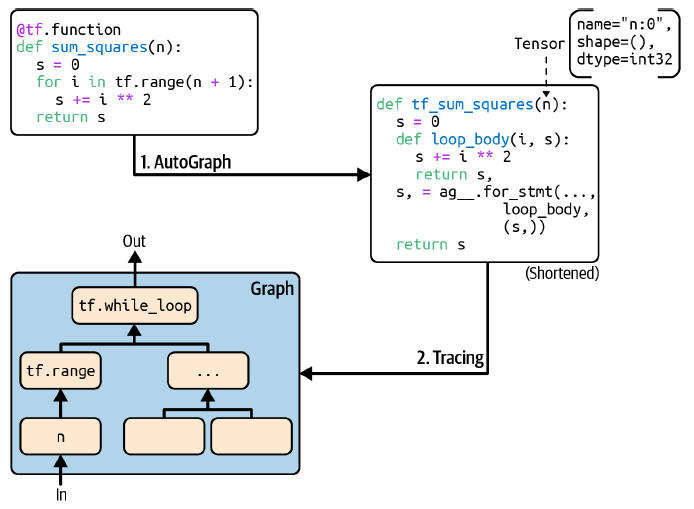<br>
    * Next, TensorFlow calls this “upgraded” function, but instead of passing the argument, it passes a symbolic tensor — a tensor without any actual value, only a name, a data type, and a shape.
    * The function will run in graph mode, meaning that each TensorFlow operation will add a node in the graph to represent itself and its output tensor(s) (as opposed to the regular mode, called eager execution, or eager mode).
        * In graph mode, TF operations do not perform any computations.
    * The final graph is generated during tracing.
        * The nodes represent operations and the arrows represent tensors.

* To view the generated function's source code , call `tf.autograph.to_code(tf_funcname.python_function)`


In [171]:
print(tf.autograph.to_code(tf_cube.python_function))

def tf__tf_cube(x):
    with ag__.FunctionScope('tf_cube', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.ld(x) ** 3
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



### D.2. TF Function Rules:

* If you call any external library, including NumPy or even the standard library, this call will run only during tracing; it will not be part of the graph. A TensorFlow graph can only include TensorFlow constructs (tensors, operations, variables, datasets, and so on). Use `tf.reduce_sum()` instead of `np.sum()`, etc..
    * You can wrap arbitrary Python code in a `tf.py_function()` operation, but doing so will hinder performance, as TensorFlow will not be able to do any graph optimization on this code.

* You can call other Python functions or TF functions, but they should follow the same rules, as TensorFlow will capture their operations in the computation graph.

* If the function creates a TensorFlow variable (or any other stateful TensorFlow object, such as a dataset or a queue), it must do so upon the very first call, and only then, or else you will get an exception.
    * It is usually preferable to create variables outside of the TF function (e.g., in the `build()` method of a custom layer).
    * If you want to assign a new value to the variable, make sure you call its `assign()` method instead of using the = operator.

* The source code of your Python function should be available to TensorFlow. If the source code is unavailable, then the graph generation process will fail or have limited functionality.

* TensorFlow will only capture for loops that iterate over a tensor or a `tf.data.Dataset`. 
    * Therefore, make sure you use `for i in tf.range(x)` rather than `for i in range(x)`, or else the loop will not be captured in the graph. Instead, it will run during tracing. (This may be what you want if the for loop is meant to build the graph; for example, to create each layer in a neural network.)

* Prefer a vectorized implementation whenever you can, rather than using loops.

### D.3. TF Functions and Concrete Functions:

* TF functions are polymorphic, meaning they support inputs of different types (and shapes).
    * Every time you call a TF function with a new combination of input types or shapes, it generates a new concrete function, with its own graph specialized for this particular combination.
    * Such a combination of argument types and shapes is called an input signature.
    * If you call the TF function with an input signature it has already seen before, it will reuse the concrete function it generated earlier.
    * You can get the concrete function for a particular combination of inputs by calling the TF function’s `get_concrete_function()` method. It can then be called like a regular function, but it will only support one input signature.

* Function Graph (FuncGraph) nad Function Definition (FunctionDef):
    * A function definition points to the parts of the graph that correspond to the function’s inputs and outputs.
    * In each FuncGraph, the nodes (ovals) represent operations (e.g., power, constants, or placeholders for arguments like x), while the edges (the solid arrows between the operations) represent the tensors that will flow through the graph.
    * The tensors in these graphs are symbolic tensors. They don't have an actual value, just a data type, a shape , and a name. They represent the future tensors that will flow through the graph once an actual value is fed to the placeholder x and the graph is executed. 
    * Symbolic tensors make it possible to specify ahead of time how to connect operations, and they also allow TensorFlow to recursively infer the data types and shapes of all tensors, given the data types and shapes of their inputs. <br>
    &emsp; 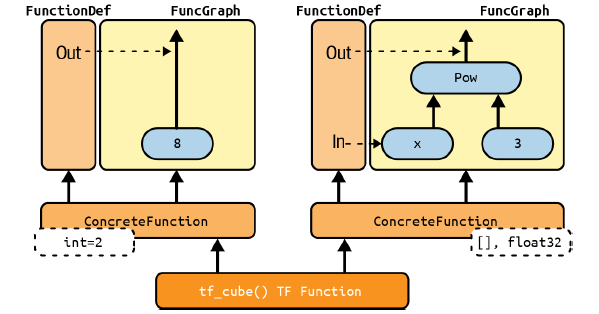 <br>

In [172]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function

<ConcreteFunction tf_cube(x) at 0x29527BCA6E0>

In [173]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [174]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### D.4. Exploring Function Definitions and Graphs:

* You can access a concrete function’s computation graph using the `graph` attribute, and get the list of its operations by calling the graph’s `get_operations()` method.

* Each operation has a lit of input and output tensors that you can easily access using the operations `inputs` and `outputs` attributes.

* Each operation has a name. It defaults to the name of the operation. You can fetch an oepration or a tensor by name using the graph's `get_operation_by_name()` or `get_tensor_by_name()` methods.

* Example of Computation Graph: <br>
    &emsp; 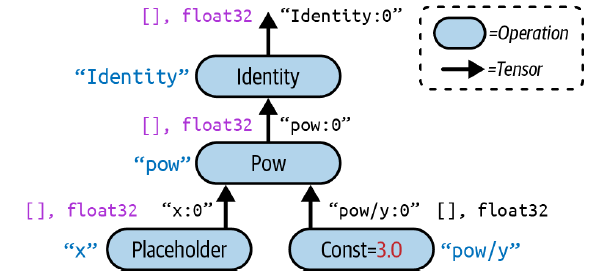

* The concrete function also contains the function definition (represented as a protocol buffer), which includes the function’s signature. This signature allows the concrete function to know which placeholders to feed with the input values, and which tensors to return.

In [175]:
concrete_function.graph

In [176]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [177]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [178]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [179]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [183]:
ops[-1].outputs

[<tf.Tensor 'Identity:0' shape=() dtype=float32>]

In [180]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [184]:
concrete_function.function_def.signature

name: "__inference_tf_cube_337117"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### D.5. Tracing

* Tracing can happen when a tf function has a new shape or new data type, compared to its previous input.

* It is also possible to restrict a TF function to a specific input signature.
    * Example: `@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])`. The tf function will accept any `float32` tensor of shape `[*, 28, 28]` and it will reuse the same concrete function every time.

In [193]:
@tf.function
def tf_cube(x):
    print(f"x = {x}")
    return x ** 3

In [194]:
result = tf_cube(tf.constant(2.0))

x = Tensor("x:0", shape=(), dtype=float32)


In [195]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [196]:
result = tf_cube(tf.constant(3.0))

In [197]:
result = tf_cube(tf.constant(4.0))

In [198]:
result = tf_cube(2)

x = 2


In [199]:
result = tf_cube(3)

x = 3


In [200]:
result = tf_cube(tf.constant([[1., 2.]]))

x = Tensor("x:0", shape=(1, 2), dtype=float32)


In [201]:
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))

x = Tensor("x:0", shape=(2, 2), dtype=float32)


In [202]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)  # to show when tracing happens
    return images[:, ::2, ::2] # drop half the rows and columns

In [204]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])

In [205]:
preprocessed_images = shrink(img_batch_1)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [206]:
preprocessed_images = shrink(img_batch_2)

In [211]:
"""

img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # TypeError! Incompatible inputs
except TypeError as ex:
    print(ex)
"""

'\n\nimg_batch_3 = tf.random.uniform(shape=[2, 2, 2])\ntry:\n    preprocessed_images = shrink(img_batch_3)  # TypeError! Incompatible inputs\nexcept TypeError as ex:\n    print(ex)\n'

### D.6. Using AutoGraph to Capture Control Flow:

* If your function contains a simple `for` loop:
    * If you use `range()`, the `for` loop will be static, it will only be executed when the function is traced. The loop will be 'unrolled' into a set of operations for each iteration.
    * If you use `tf.range()`, the loop will be dynamic, it will be included in the graph itself (but it will not run during tracing).

* If you want the graph to contain a “dynamic” loop instead (i.e., one that runs when the graph is executed), you can create one manually using the `tf.while_loop()` operation, but it is not very intuitive. Instead, it is much simpler to use TensorFlow’s AutoGraph feature. AutoGraph is actually activated by default (if you ever need to turn it off, you can pass `autograph=False` to `tf.function()` ). It only captures for loops that iterate over tensors of `tf.data.Dataset`
objects, so you could use `tf.range()`, not `range()`.

In [212]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [213]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [214]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [215]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [216]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [217]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [218]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [219]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### D.7. Handling Variables and Other Resources in TF Functions:

* In TensorFlow, variables and other stateful objects, such as queues or datasets, are called **resources**.
    * TF functions treat them with special care: any operation that reads or updates a resource is considered stateful, and TF functions ensure that stateful operations are executed in the order they appear (as opposed to stateless operations, which may be run in parallel, so their order of execution is not guaranteed).
    * When you pass a resource as an argument to a TF function, it gets passed by reference, so the function may modify it.

In [220]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

increment(counter) 

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [221]:
increment(counter) 

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [222]:
counter

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [223]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [224]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [225]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [226]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [227]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [229]:
c.counter

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [230]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [231]:
# display the autograph code with syntax highlighting

def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown(f'```python\n{code}\n```'))

display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### D.8. Using TF Functions w/ Keras (or Not)

* By default, any custom function, layer, or model you use with Keras will automatically be converted to a TF function.
* However, in some cases you may want to deactivate this automatic conversion—for example, if your custom code cannot be turned into a TF function, or if you just want to debug your code.
    * To do this, you can simply pass `dynamic=True` when creating the model or any of its layers.